<a href="https://colab.research.google.com/github/AshishPandey88/Nanda-Devi-Glacier-Loss/blob/main/Nanda_devi_Glacier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.io import imread, imshow
import numpy as np
from skimage.future import graph
from skimage import segmentation, color, filters,io,data
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os

In [73]:
from google.colab import drive
image_name=[image_name for image_name in os.listdir('/content/Nanda_devi_Glacier')]
image_name.sort()

In [74]:
image_name

['1984.jpg', '1995.jpg', '2005.jpg', '2010.jpg', '2015.jpg', '2022.jpg']

In [75]:
folder='/content/Nanda_devi_Glacier'

In [76]:
image_path=[]
for i in image_name:
    image_path.append(folder+"//"+ i)

In [77]:
image=[]
for i in image_path:
    img=load_img(i)
    img=img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    image.append(img)

In [78]:
 img = np.vstack(image)

In [79]:
img.shape

(6, 914, 1374, 3)

In [80]:
title=['Year-1984', 'Year-1995', 'Year-2005', 'Year-2010', 'Year-2015','Year-2022']

In [81]:
from skimage.filters import threshold_multiotsu

In [82]:
gimg=color.rgb2gray(img)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


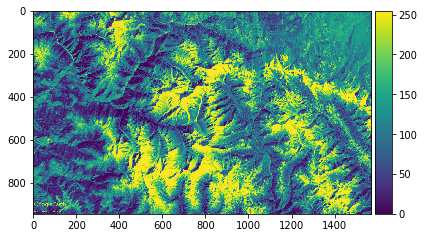

In [25]:
imshow(gimg[4])

In [83]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(gimg[4],classes=4)

In [85]:
thresholds

array([ 56.279297, 114.052734, 184.77539 ], dtype=float32)

In [92]:
# Using the threshold values, we generate the three regions.
regions = np.digitize(gimg, bins=thresholds)

In [155]:
glacier_cover=[]
for i in range(img.shape[0]):
  glacier_cover.append((round(np.count_nonzero(regions[i]==3)/(regions[i].shape[0]*regions[i].shape[1]),2)))

In [87]:
print("max cluster number {}, min cluster number {}".format(regions[0].max(),regions[0].min()))

max cluster number 3, min cluster number 0


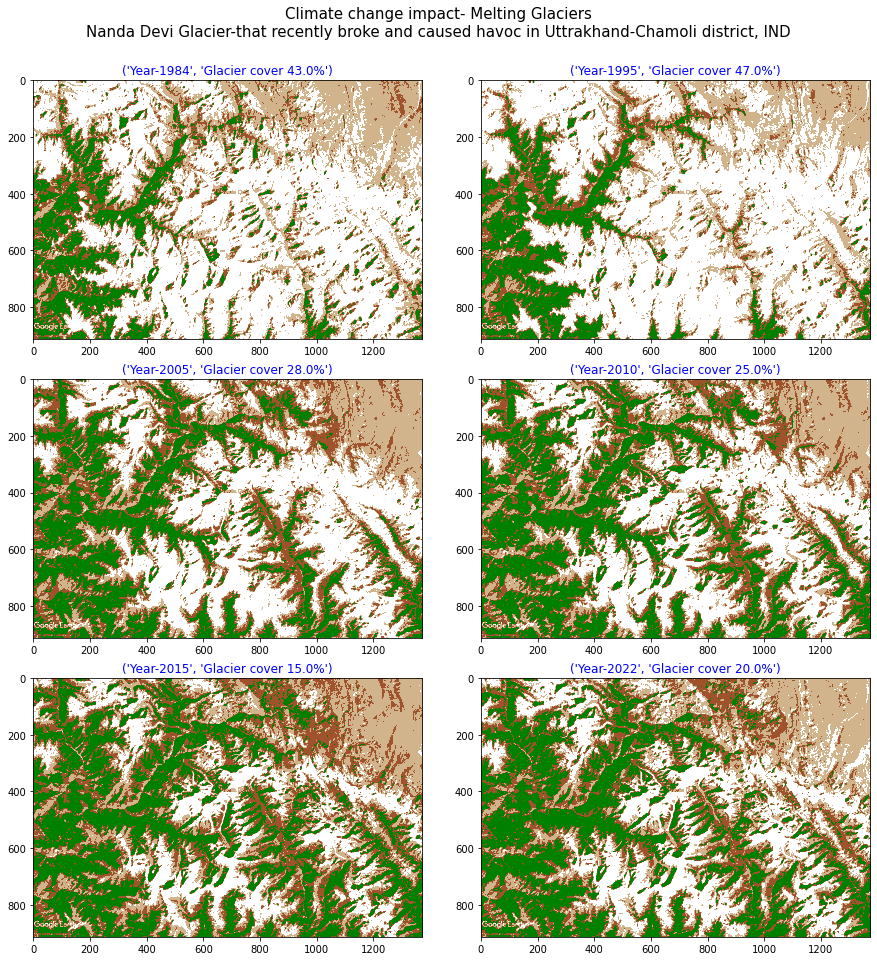

In [173]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#fig,ax=plt.subplots(2,2,figsize=(15,15))
fig, ax=plt.subplots(3,2,figsize=(15,15))
#fig.suptitle('Impact of increase in net land usage on Bellandur & Varthur Lake over 2 decades', fontsize=20)
fig.suptitle('Climate change impact- Melting Glaciers\nNanda Devi Glacier-that recently broke and caused havoc in Uttrakhand-Chamoli district, IND', fontsize=15)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.1,top=0.93)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in range(len(glacier_cover)):
        ax[i].set_title((title[i],'Glacier cover {}%'.format(round(glacier_cover[i]*100,2))), color='blue')
        #ax[j].set_title(glacier_cover[j])
        #plt.text(200, 500, "Bellandur Lake", bbox=dict(fill=True,facecolor='white', edgecolor='white', linewidth=2))
        #plt.text(1400, 350, "Varthur Lake", bbox=dict(fill=True,facecolor='white', edgecolor='white', linewidth=2))
        ax[i].imshow(regions[i], cmap=ListedColormap(["green","sienna","tan","white"]))
        
io.show()